# DATA ANALYSIS (PANDAS), VISUALIZATION (MATPLOTLIB), AND OPTIMIZATION (CVXPY) using daily stock prices

# 1. Some work with the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dstocks = pd.read_csv('Stocks2-closeP.csv')
plt.figure()
dstocks.plot(grid = True, figsize = [10,5]).axhline(y = 0, color = "black", lw = 1)
plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 1000x500 with 1 Axes>

# Compute and visualize growth rates of prices (from one day to the next)

In [2]:
dstocks.head()

,timestamp,F_close,BA_close,RTN_close,VLO_close,AAL_close,CI_close,IBM_close,PG_close
0,2018-12-03,9.60,359.96,172.87,81.30,39.65,224.84,125.31,93.32
1,2018-11-30,9.41,346.76,175.34,79.90,40.16,223.38,124.27,94.51
2,2018-11-29,9.37,342.56,173.58,79.47,38.42,222.52,121.48,92.82
3,2018-11-28,9.41,333.50,173.61,79.42,38.94,221.72,123.00,93.01
4,2018-11-27,9.28,318.03,171.67,77.43,38.29,216.80,120.03,92.72


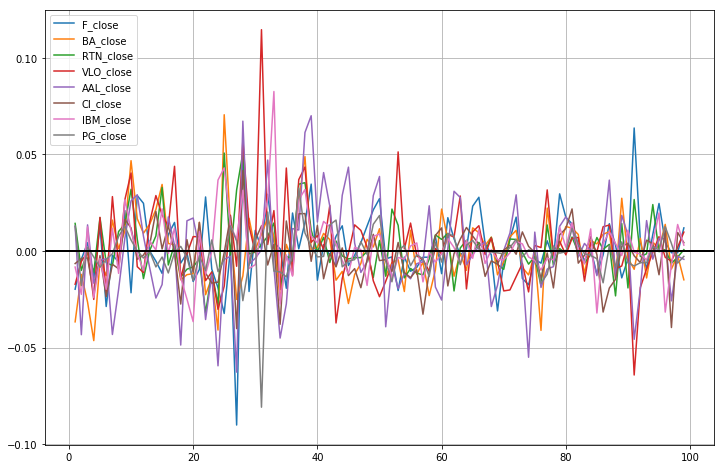

In [3]:
stock = dstocks.iloc[:,[1,2,3,4,5,6,7,8]] # Select colum 1-7 from the DataFrame

#Compute growth rates of that stock as [p2-p1]/p1
# A lambda function is applied locally
stock_change = stock.apply(lambda x: ((x - (x.shift(1))) / (x.shift(1))))

# Plot the dataframe of growth rates
stock_change.plot(grid = True, figsize = (12,8)).axhline(y = 0, color = "black", lw = 2)
# Then save the figure as a pdf file
plt.savefig('sample.pdf')

In [4]:
stock_change.describe()

,F_close,BA_close,RTN_close,VLO_close,AAL_close,CI_close,IBM_close,PG_close
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,0.001533,-0.000098,0.001566,0.003054,-0.000345,-0.002542,0.001668,-0.001568
std,0.018762,0.018182,0.014618,0.022393,0.025471,0.013925,0.016353,0.012037
min,-0.090100,-0.046387,-0.032019,-0.064196,-0.062712,-0.040167,-0.036565,-0.080871
25%,-0.006910,-0.012120,-0.006867,-0.009816,-0.013569,-0.010719,-0.006087,-0.006079
50%,0.000000,0.001198,-0.000471,0.000939,-0.002675,-0.002115,0.000497,-0.001440
75%,0.012456,0.009760,0.007055,0.012680,0.013199,0.006023,0.009997,0.003705
max,0.063701,0.070562,0.050903,0.114597,0.070045,0.041700,0.082581,0.032585


In [5]:
#Extract the means
stock_means = stock_change.describe().iloc[1].values
stock_means

array([ 1.53312543e-03, -9.78656433e-05,  1.56556211e-03,  3.05362244e-03,
       -3.44881762e-04, -2.54221897e-03,  1.66838621e-03, -1.56833518e-03])

In [6]:
#Extract the variances
stock_variance = stock_change.var()
stock_variance

F_close      0.000352
BA_close     0.000331
RTN_close    0.000214
VLO_close    0.000501
AAL_close    0.000649
CI_close     0.000194
IBM_close    0.000267
PG_close     0.000145
dtype: float64

In [7]:
# Make covariance matrix
stock_var = stock_change.cov()

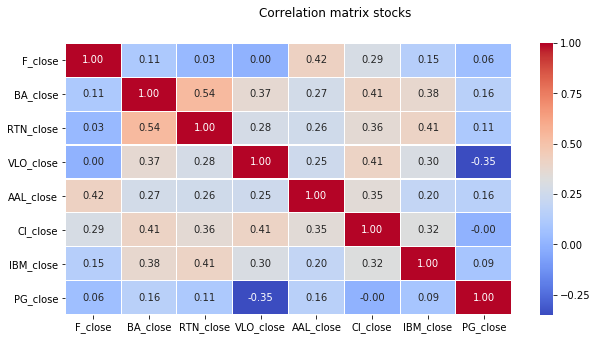

In [8]:
# Correlations matrix prettyfied

import seaborn as sns

f, ax = plt.subplots(figsize=(10, 5))
corr = stock_change.corr()
sns.heatmap(round(corr,2), annot=True,  ax=ax, cmap = "coolwarm", fmt='.2f', linewidths=.05)
t = f.suptitle('Correlation matrix stocks', fontsize=12)

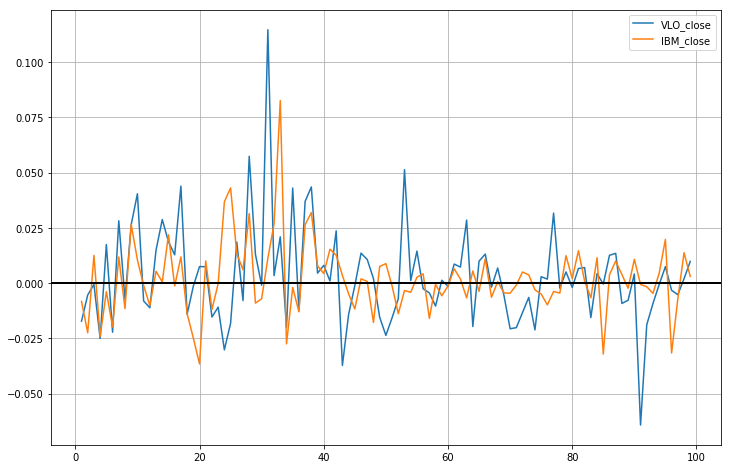

In [9]:
# Plot the dataframe means of the two highest growth rates
stock_change[['VLO_close', 'IBM_close']].plot(grid = True, figsize = (12,8)).axhline(y = 0, color = "black", lw = 2)
# Then save the figure as a pdf file
#plt.savefig('Louis_Booth_Means.pdf')

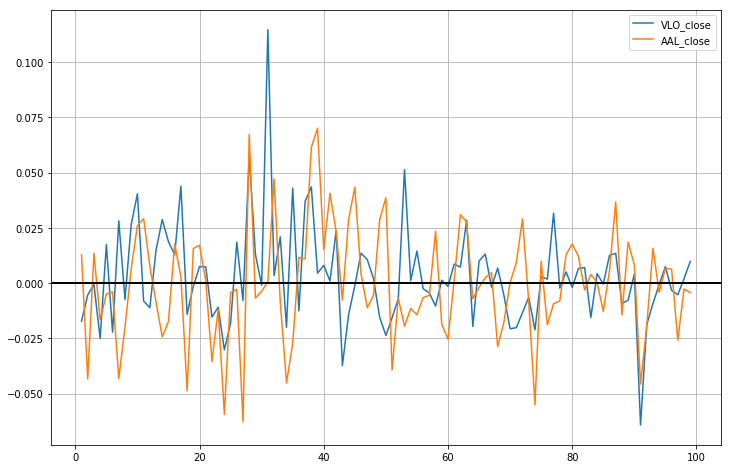

In [10]:
# Plot the dataframe variances of the two highest growth rates
stock_change[['VLO_close', 'AAL_close']].plot(grid = True, figsize = (12,8)).axhline(y = 0, color = "black", lw = 2)
# Then save the figure as a pdf file
#plt.savefig('Louis_Booth_Variances.pdf')

# 2. Optimal Portfolio

In [11]:
import numpy as np
from cvxpy import *

Sigma = stock_var.values
mu = stock_means

w = Variable(8) # Decision variable


gamma = 2 # Risk Parameter in the utility function
ret = mu*w
risk = quad_form(w, Sigma)

obj = Maximize(ret - gamma*risk)
constraints = [sum(w) == 1 , w >=0]

# Form the problem
prob = Problem(obj, constraints)
prob.solve()

0.002084458730516421

In [13]:
port_data = []
ret_data = []
risk_data = []
prob_data = []

gamma_vals = [2,10]
for i in range(2):
    gamma = gamma_vals[i]
    prob.solve() # Solve the problem for a specific value of gamma
    risk_data.append(sqrt(risk).value) # optimal value of the risk (standard deviation)
    ret_data.append(ret.value) # optimal value of the return
    prob_data.append(prob.value) # maximum utility
    port_data.append(w.value)  

In [14]:
port_data

[matrix([[1.40867090e-01],
         [9.97794533e-09],
         [1.58815562e-07],
         [8.59132511e-01],
         [8.70046757e-09],
         [4.51716096e-09],
         [2.09439283e-07],
         [7.60726783e-09]]), matrix([[1.40867090e-01],
         [9.97794533e-09],
         [1.58815562e-07],
         [8.59132511e-01],
         [8.70046757e-09],
         [4.51716096e-09],
         [2.09439283e-07],
         [7.60726783e-09]])]

In [18]:
# Present your results nicely

results = pd.DataFrame({'Portfolio':['F', 'BA', 'RTN', 'VLO', 'AAL', 'CI', 'IBM', 'PG'], 'Risk Coeff 2':port_data[0], 'Risk Coeff 10':port_data[1]})
results

Exception: Data must be 1-dimensional